# Analysis of sold new cars in Estonia 2024

Data is taken from official source - https://www.transpordiamet.ee/soidukitega-tehtud-toimingute-statistika

Only new cars where used in this analysis.


## Initial data

In [ ]:
%reload_ext autoreload
%autoreload 0

# fix imports
import sys

sys.path.append("..")

In [2]:
from pathlib import Path
from mnt_sum import (
    get_summary,
    COLUMNS,
    PRIVATE_CUSTOMER,
    COLUMN_SHORT_NAME,
    COLUMN_CUSTOMER,
    COLUMN_CITY,
    COLUMN_TRANSMISSION,
)

df_o = get_summary(Path("../data/2024"))
df_o.describe()

,Esm reg aasta,Mootori võimsus,Mootori maht,CO2_NEDC,CO2_WLTP,Istekohti,Telgi kokku,Registrimass,Tühimass,Täismass,Arv,CO2 WLTP,ISTEKOHTI,TELGI_KOKKU,REG_MASS,TYHIMASS,TAISMASS
count,22010.0,22010.00000,22010.000000,646.000000,18332.000000,19062.000000,19062.000000,19062.000000,19062.000000,19062.000000,22010.000000,2843.000000,2948.000000,2948.000000,2948.000000,2948.000000,2948.000000
mean,2024.0,124.52496,1745.380918,76.808050,139.801495,5.169814,2.000315,2223.401584,1752.084828,2223.401584,1.252385,134.649314,5.141452,2.000339,2206.219471,1740.831072,2206.219471
std,0.0,61.12362,750.507226,74.730816,54.655323,0.726315,0.017739,436.853073,391.611362,436.853073,1.566509,55.483041,0.681327,0.018418,425.885455,380.847231,425.885455
min,2024.0,18.60000,0.000000,0.000000,0.000000,1.000000,2.000000,1230.000000,959.000000,1230.000000,1.000000,0.000000,2.000000,2.000000,1260.000000,1030.000000,1260.000000
25%,2024.0,96.00000,1490.000000,0.000000,120.000000,5.000000,2.000000,1910.000000,1465.000000,1910.000000,1.000000,117.000000,5.000000,2.000000,1910.000000,1469.000000,1910.000000
50%,2024.0,110.00000,1598.000000,113.000000,136.000000,5.000000,2.000000,2145.000000,1687.000000,2145.000000,1.000000,136.000000,5.000000,2.000000,2145.000000,1690.000000,2145.000000
75%,2024.0,136.00000,1993.000000,121.000000,161.000000,5.000000,2.000000,2419.000000,1920.000000,2419.000000,1.000000,157.000000,5.000000,2.000000,2388.000000,1900.000000,2388.000000
max,2024.0,607.00000,6749.000000,381.000000,410.000000,9.000000,3.000000,5500.000000,4900.000000,5500.000000,95.000000,369.000000,9.000000,3.000000,5500.000000,4719.000000,5500.000000


In [3]:
df = df_o[COLUMNS]

df.head()

,Mark,Mudel,short name,Mootori tüüp,Mootori maht,Mootori võimsus,Käigukasti tüüp,Linn,Tüüp (isik),Arv,Värv
74,AUDI,A1 ALLSTREET,AUDI A1,BENSIIN_KATALYSAATOR,999,81.0,AUTOMAAT,Määramata,FÜÜSILINE,2,HALL
75,AUDI,A1 ALLSTREET,AUDI A1,BENSIIN_KATALYSAATOR,999,81.0,AUTOMAAT,Tallinn,JURIIDILINE,1,VALGE
76,AUDI,A3 SPORTBACK,AUDI A3,BENSIIN_HYBRIID,999,81.0,AUTOMAAT,Tallinn,JURIIDILINE,1,HALL
77,AUDI,A3 SPORTBACK,AUDI A3,BENSIIN_HYBRIID,999,81.0,AUTOMAAT,Tallinn,JURIIDILINE,1,MUST
78,AUDI,A3 SPORTBACK,AUDI A3,BENSIIN_HYBRIID,999,81.0,AUTOMAAT,Keila,JURIIDILINE,1,HALL


## Add additional data

In [4]:
import yaml
from utils.file import read_file

SUVS = set(yaml.safe_load(read_file("../data/suvs.yaml").lower()))

df["SUV"] = df[COLUMN_SHORT_NAME].str.lower().isin(SUVS)
df[df["SUV"]].head(5)

/tmp/ipykernel_1273984/1646298486.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SUV"] = df[COLUMN_SHORT_NAME].str.lower().isin(SUVS)


,Mark,Mudel,short name,Mootori tüüp,Mootori maht,Mootori võimsus,Käigukasti tüüp,Linn,Tüüp (isik),Arv,Värv,SUV
94,AUDI,E-TRON GT,AUDI E-TRON,ELEKTER,0,140.0,AUTOMAAT,Määramata,JURIIDILINE,2,HALL,True
95,AUDI,E-TRON GT,AUDI E-TRON,ELEKTER,0,140.0,AUTOMAAT,Määramata,JURIIDILINE,1,MUST,True
96,AUDI,E-TRON GT,AUDI E-TRON,ELEKTER,0,140.0,AUTOMAAT,Määramata,JURIIDILINE,1,MUST,True
97,AUDI,E-TRON GT,AUDI E-TRON,ELEKTER,0,140.0,AUTOMAAT,Määramata,JURIIDILINE,1,SININE,True
98,AUDI,Q4 40 E-TRON,AUDI Q4,ELEKTER,0,70.0,AUTOMAAT,Tallinn,JURIIDILINE,1,HALL,True


# Total sold cars

In [5]:
df["Arv"].sum()

27565

# Popular fuels

                        Arv
Mootori tüüp               
BENSIIN_HYBRIID       12462
BENSIIN_KATALYSAATOR   7284
DIISEL                 4750
DIISEL_HYBRIID         1472
ELEKTER                1444
CNG                     151
BENSIIN                   2


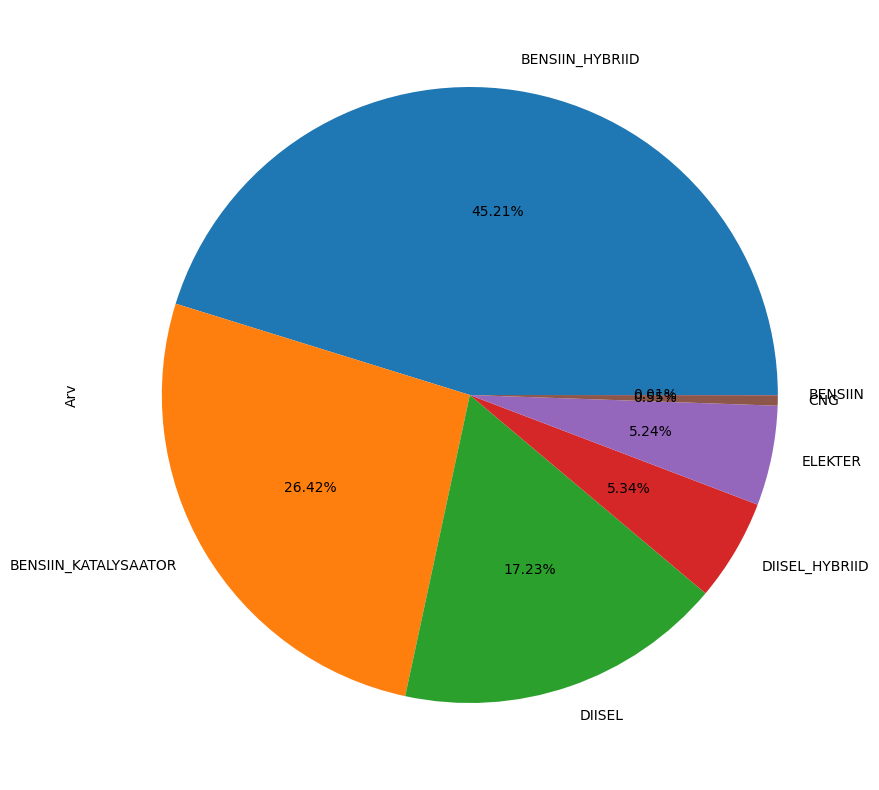

In [ ]:
import matplotlib.pyplot as plt


def show_pie(dataframe, groupby, index=None):
    plt.figure(figsize=(10, 10))
    dataframe = (
        dataframe.groupby([groupby], as_index=False)["Arv"]
        .sum()
        .sort_values("Arv", ascending=False)
        .reset_index(drop=True)
    )
    if index:
        dataframe.index = index
    else:
        dataframe = dataframe.set_index(groupby)
    dataframe["Arv"].plot.pie(autopct="%1.2f%%")
    print(dataframe)


show_pie(df, "Mootori tüüp")

# Popular colors

               Arv
Värv              
HALL          8846
VALGE         4599
MUST          4486
SININE        2530
PUNANE        1629
ROHELINE      1413
TUMEHALL       924
PRUUN          633
HÕBEDANE       529
BEEŽ           300
KOLLANE        299
TUMESININE     207
ORANŽ          161
HOBEDANE       160
TUMEPUNANE     127
BEEZ           119
LILLA          100
HELEHALL        87
KULDNE          81
HELEROHELINE    75
HELESININE      73
ORANZ           57
TUMEROHELINE    55
HELEPRUUN       27
HELEBEEŽ        17
TUMEPRUUN       15
HELEBEEZ        12
ROOSA            4


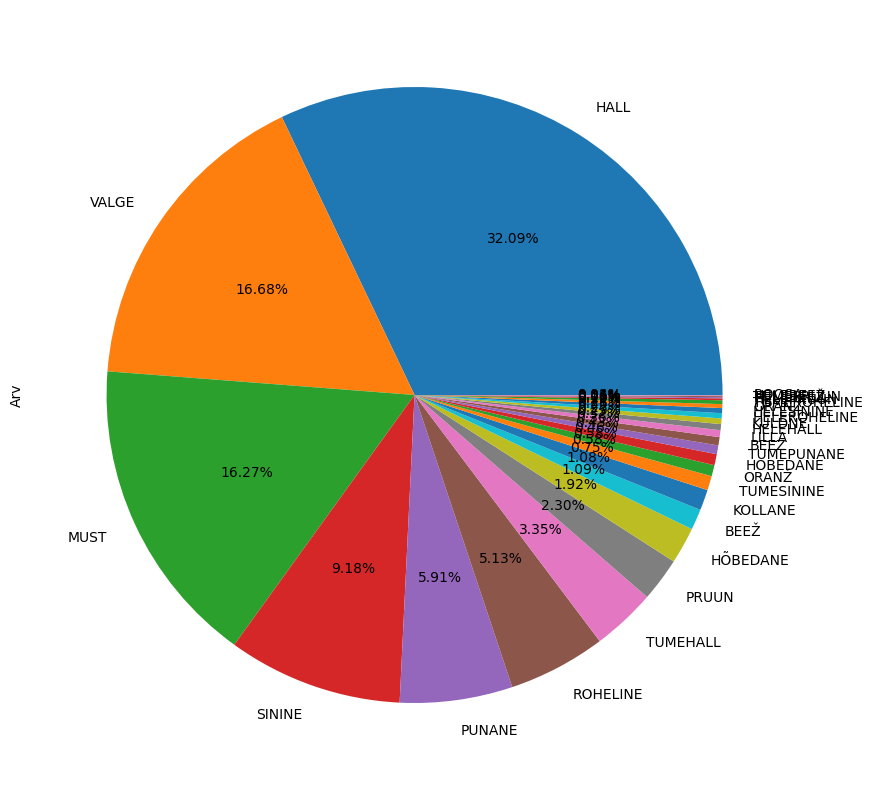

In [7]:
show_pie(df, "Värv")

# Engine capacities

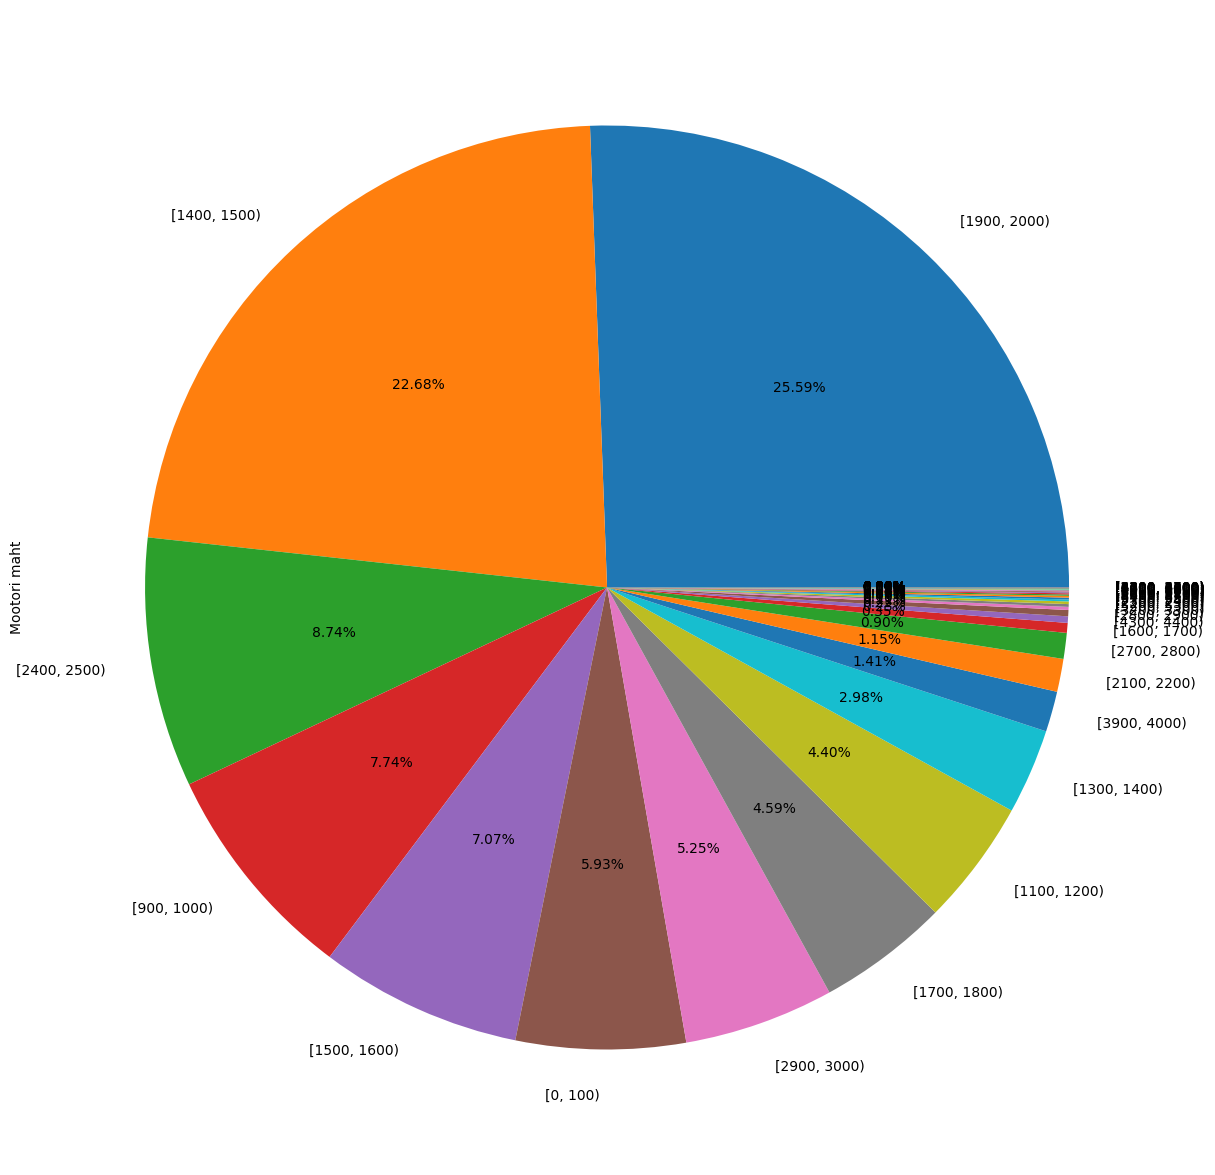

In [ ]:
import pandas as pd

plt.figure(figsize=(15, 15))

bins = range(df["Mootori maht"].min(), df["Mootori maht"].max() + 100, 100)
capacities = pd.cut(df["Mootori maht"], bins, right=False).value_counts()
capacities.plot(kind="pie", autopct="%1.2f%%")
pass

# Popular transmission types

                       Arv
Käigukasti tüüp           
AUTOMAAT             18094
CVT                   5865
MANUAAL               2683
KONSTANTNE_ÜLEKANNE    243
MUU                    241
KONSTANTNE_YLEKANNE    235
DCT                      8
AUTOMAT_MANUAAL          1


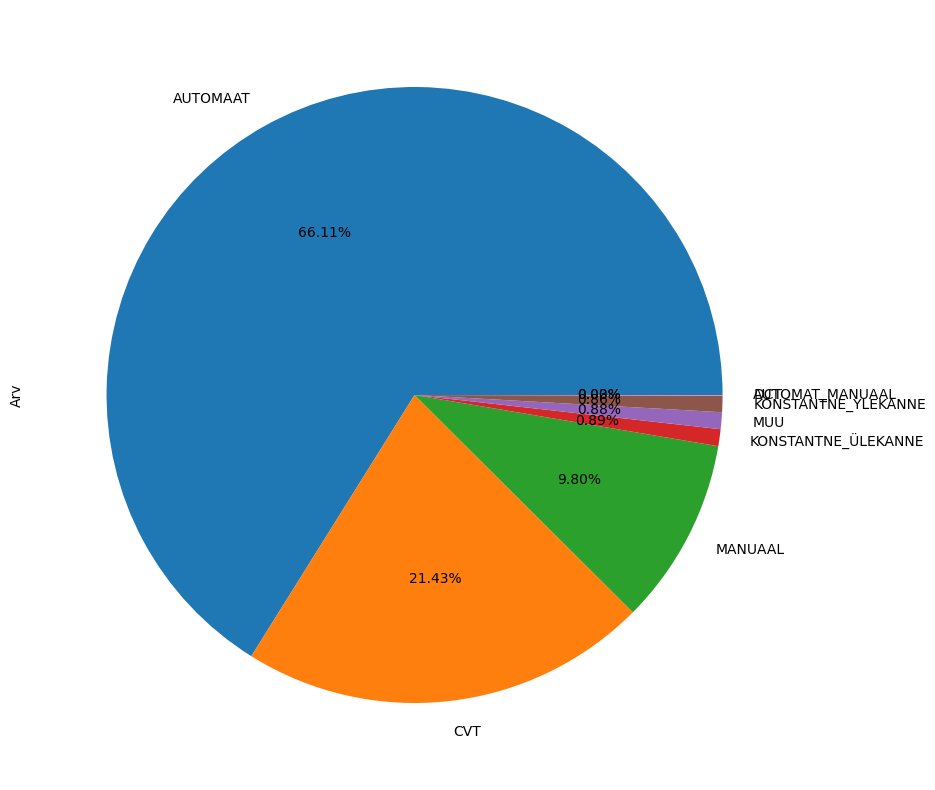

In [9]:
show_pie(df, COLUMN_TRANSMISSION)

# Customer type

               Arv
Tüüp (isik)       
JURIIDILINE  16038
FÜÜSILINE    11429
RIIGI           97
ASUTAMISEL       1


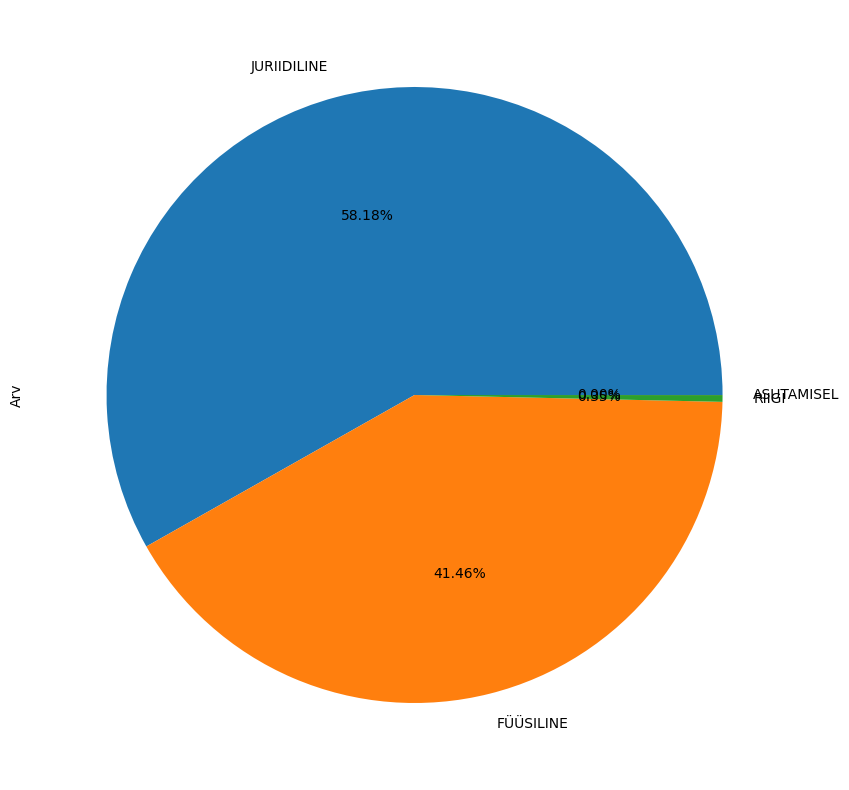

In [27]:
show_pie(df, COLUMN_CUSTOMER)

# Top 10 popular manufacturers

          Mark   Arv
1        SKODA  5503
2       TOYOTA  4794
3   VOLKSWAGEN  2464
4          KIA  1807
5      RENAULT  1545
6        DACIA  1238
7         AUDI  1093
8      PEUGEOT   961
9      HYUNDAI   799
10      SUBARU   797


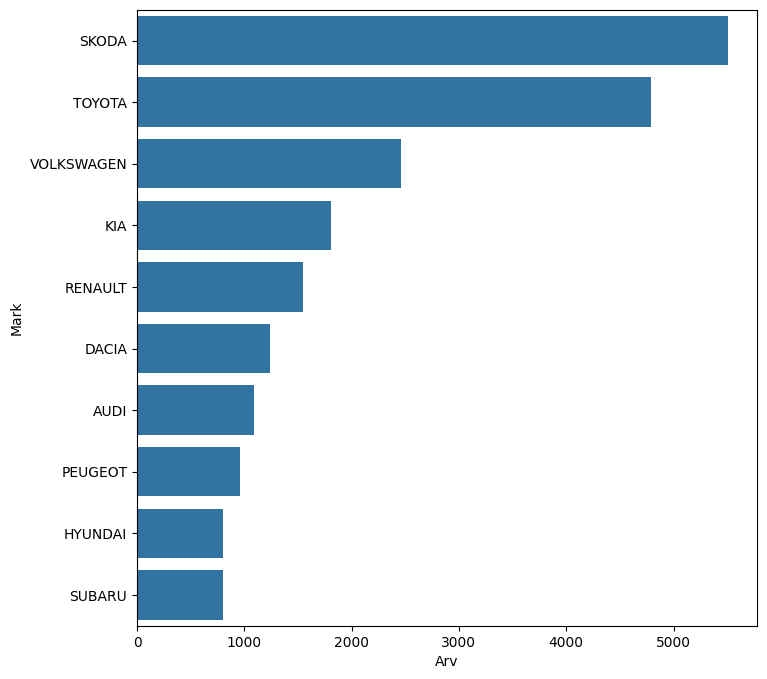

In [ ]:
import seaborn as sns

LIMIT = 10


def group_and_sort(data_frame, selection):
    return (
        data_frame.groupby(selection, as_index=False)["Arv"]
        .sum()
        .sort_values("Arv", ascending=False)
        .reset_index(drop=True)
    )


def group_sort_and_plot(data_frame, selection, x="Arv", y=None, limit=LIMIT, plot=True):
    data = group_and_sort(data_frame, selection)
    data.index += 1
    y = selection[0] if y is None else y
    if plot:
        plt.figure(figsize=(8, 8))
        sns.barplot(x=x, y=y, data=data[:limit], orient="h")
    print(data.head(limit))


group_sort_and_plot(df, ["Mark"])

## Top 10 popular car models

            short name   Arv
1        SKODA OCTAVIA  1859
2         SKODA KODIAQ  1576
3       TOYOTA COROLLA  1369
4          TOYOTA RAV4  1088
5    VOLKSWAGEN TIGUAN   929
6         KIA SPORTAGE   823
7   TOYOTA YARIS CROSS   619
8         DACIA DUSTER   560
9         SKODA SUPERB   558
10      SUBARU OUTBACK   487


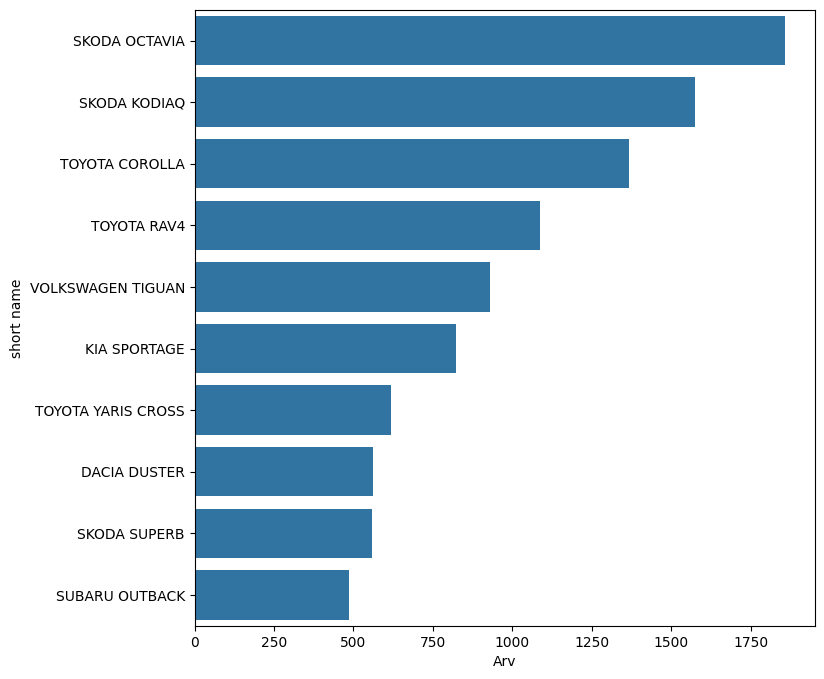

In [11]:
group_sort_and_plot(df, [COLUMN_SHORT_NAME])

### Top 10 popular diesel models

             short name  Arv
1          SKODA KODIAQ  910
2         SKODA OCTAVIA  697
3     VOLKSWAGEN TIGUAN  275
4      CITROEN BERLINGO  246
5   TOYOTA LAND CRUISER  237
6               AUDI Q5  217
7          DACIA DUSTER  202
8          SKODA SUPERB  179
9          KIA SPORTAGE  149
10   VOLKSWAGEN TOUAREG  145


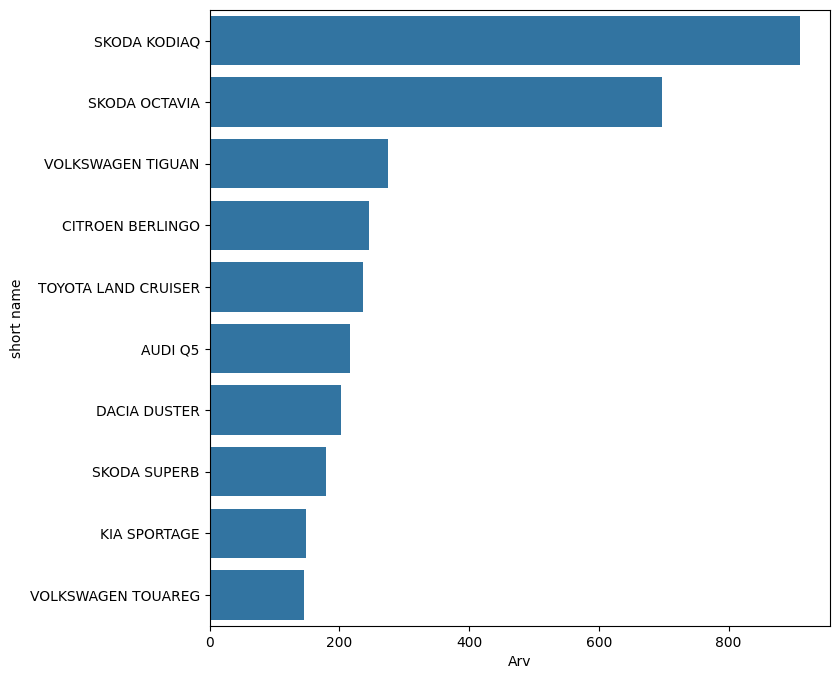

In [12]:
df_diesel = df[df["Mootori tüüp"].str.contains("DIISEL", case=False)]

group_sort_and_plot(df_diesel, [COLUMN_SHORT_NAME])

### Top 10 popular petrol models

        short name  Arv
1   SUBARU OUTBACK  487
2    DACIA SANDERO  439
3     RENAULT CLIO  437
4      SKODA KAMIQ  390
5      SKODA FABIA  386
6         KIA CEED  343
7      SKODA SCALA  286
8      SKODA KAROQ  236
9     SKODA KODIAQ  219
10    DACIA JOGGER  208


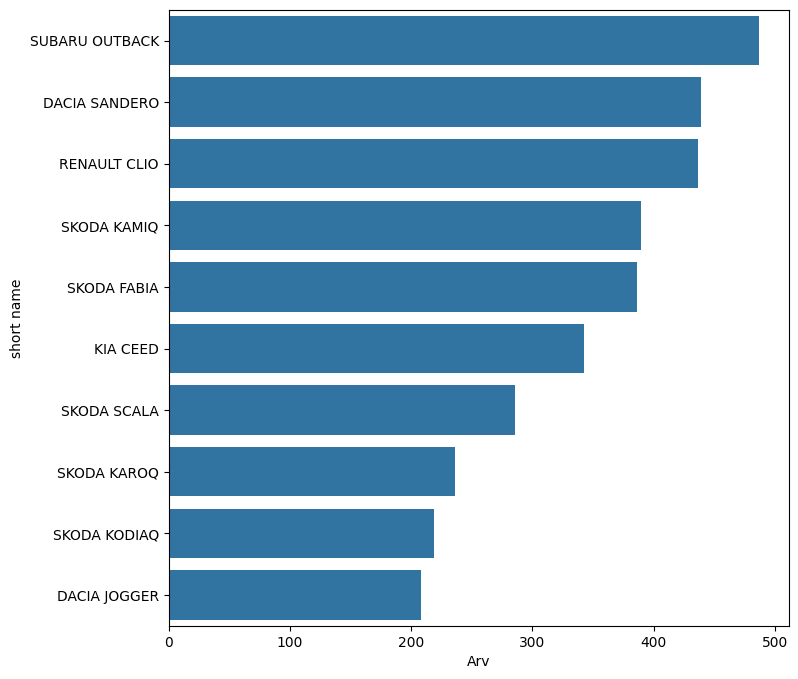

In [13]:
df_petrol = df[df["Mootori tüüp"].isin(["BENSIIN_KATALYSAATOR", "BENSIIN"])]

group_sort_and_plot(df_petrol, [COLUMN_SHORT_NAME])

### Top 10 popular hybrid models(diesel and petrol)


            short name   Arv
1       TOYOTA COROLLA  1331
2          TOYOTA RAV4  1025
3        SKODA OCTAVIA   950
4         KIA SPORTAGE   761
5   TOYOTA YARIS CROSS   580
6    VOLKSWAGEN TIGUAN   532
7         SKODA KODIAQ   447
8          TOYOTA C-HR   439
9       HYUNDAI TUCSON   358
10      RENAULT CAPTUR   341


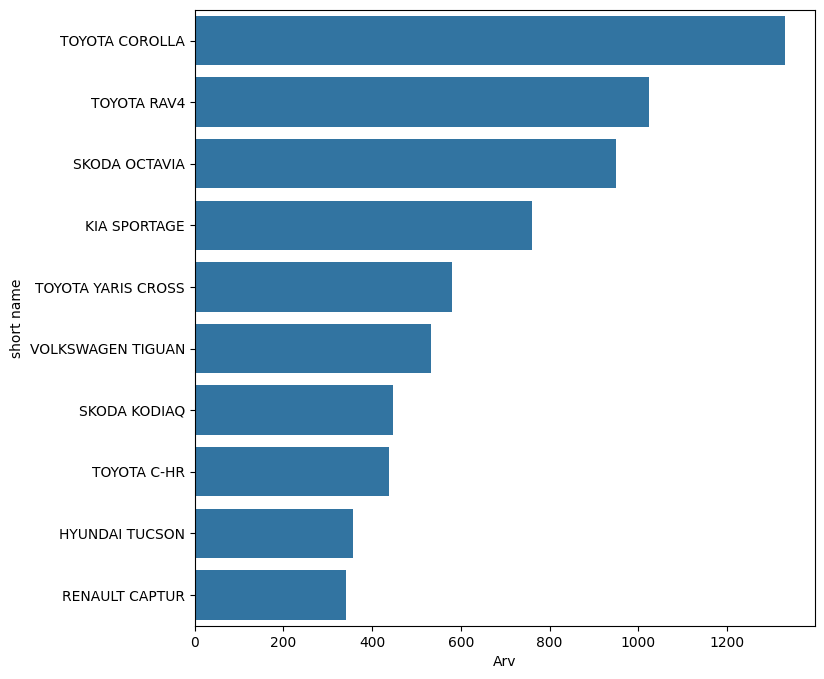

In [14]:
df_hybrids = df[df["Mootori tüüp"].str.contains("HYBRIID", case=False)]

group_sort_and_plot(df_hybrids, [COLUMN_SHORT_NAME])

### Top 10 popular electric models

                                        short name  Arv
1                                      SKODA ENYAQ  147
2                                    TESLA MODEL 3   87
3                                      TOYOTA BZ4X   85
4                                    TESLA MODEL Y   82
5                                       VOLVO EX30   72
6                                   HYUNDAI IONIQ5   72
7   GREAT WALL MOTOR COMPANY LIMITED ORA FUNKY CAT   60
8                                          AUDI Q8   54
9                                     NISSAN ARIYA   46
10                                 VOLKSWAGEN ID.4   42


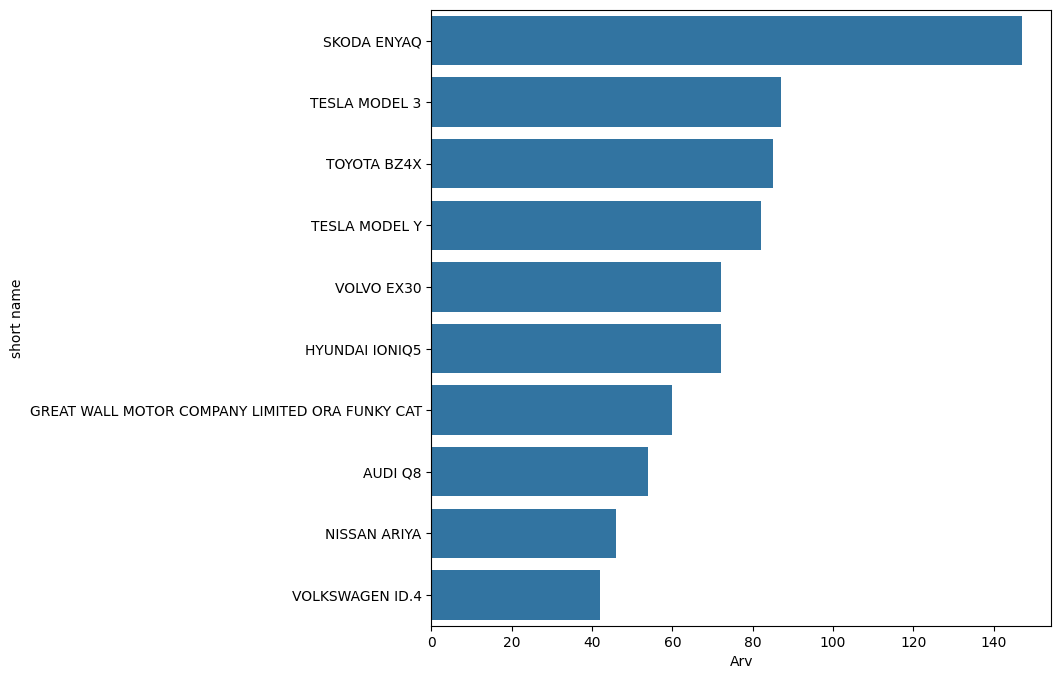

In [15]:
df_electric = df[df["Mootori tüüp"] == "ELEKTER"]

group_sort_and_plot(df_electric, [COLUMN_SHORT_NAME])

### Top 10 popular cars by private owners

            short name  Arv
1         SKODA KODIAQ  784
2        SKODA OCTAVIA  716
3       TOYOTA COROLLA  690
4          TOYOTA RAV4  591
5         KIA SPORTAGE  567
6    VOLKSWAGEN TIGUAN  410
7   TOYOTA YARIS CROSS  359
8       SUBARU OUTBACK  327
9          TOYOTA C-HR  289
10      HYUNDAI TUCSON  244


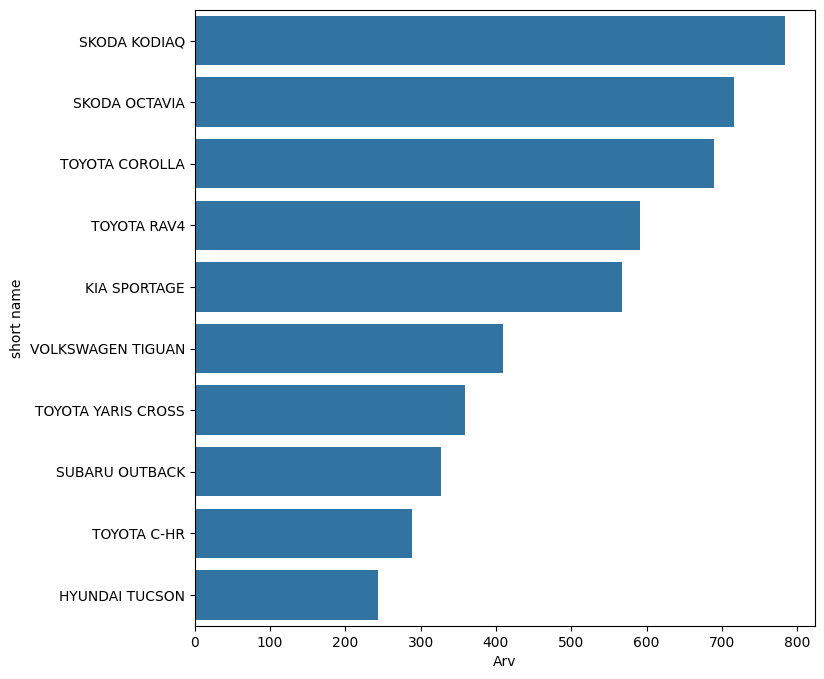

In [16]:
df_private = df[df[COLUMN_CUSTOMER].str.contains(PRIVATE_CUSTOMER, case=False)]

group_sort_and_plot(df_private, [COLUMN_SHORT_NAME])

### Top 10 popular cars by company owners

           short name   Arv
1       SKODA OCTAVIA  1143
2        SKODA KODIAQ   792
3      TOYOTA COROLLA   679
4   VOLKSWAGEN TIGUAN   519
5         TOYOTA RAV4   497
6        RENAULT CLIO   437
7      RENAULT CAPTUR   423
8        SKODA SUPERB   346
9        DACIA DUSTER   332
10      DACIA SANDERO   329


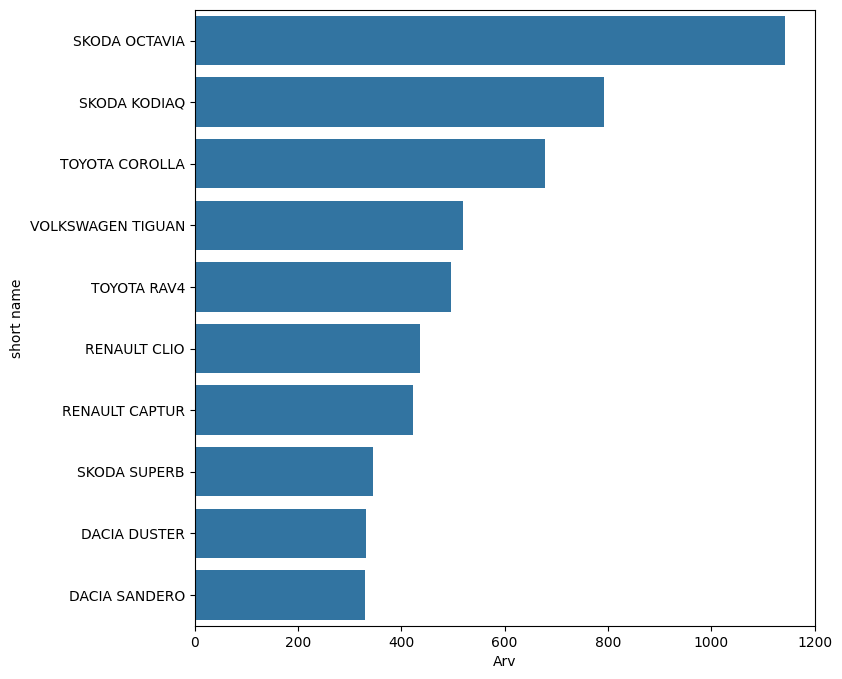

In [17]:
df_corporate = df[~df[COLUMN_CUSTOMER].str.contains(PRIVATE_CUSTOMER, case=False)]

group_sort_and_plot(df_corporate, [COLUMN_SHORT_NAME])

### SUV vs non SUV

           SUV    Arv
non-SUV  False  14190
SUV       True  13375


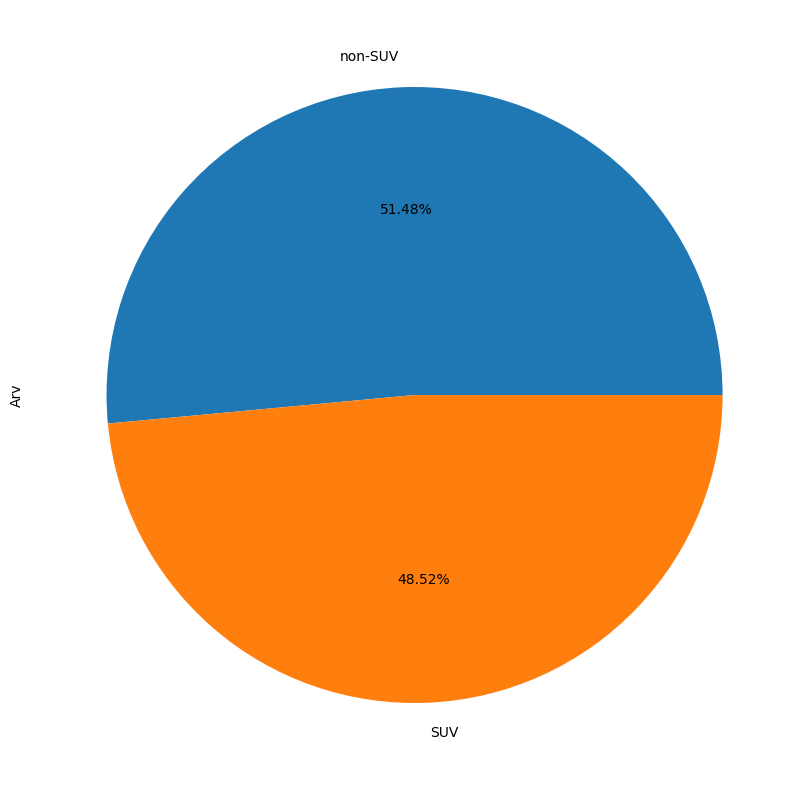

In [18]:
show_pie(df, "SUV", index=["non-SUV", "SUV"])

### Popular fuels in SUV

                       Arv
Mootori tüüp              
BENSIIN_HYBRIID       7324
BENSIIN_KATALYSAATOR  2645
DIISEL                2293
DIISEL_HYBRIID         625
ELEKTER                488


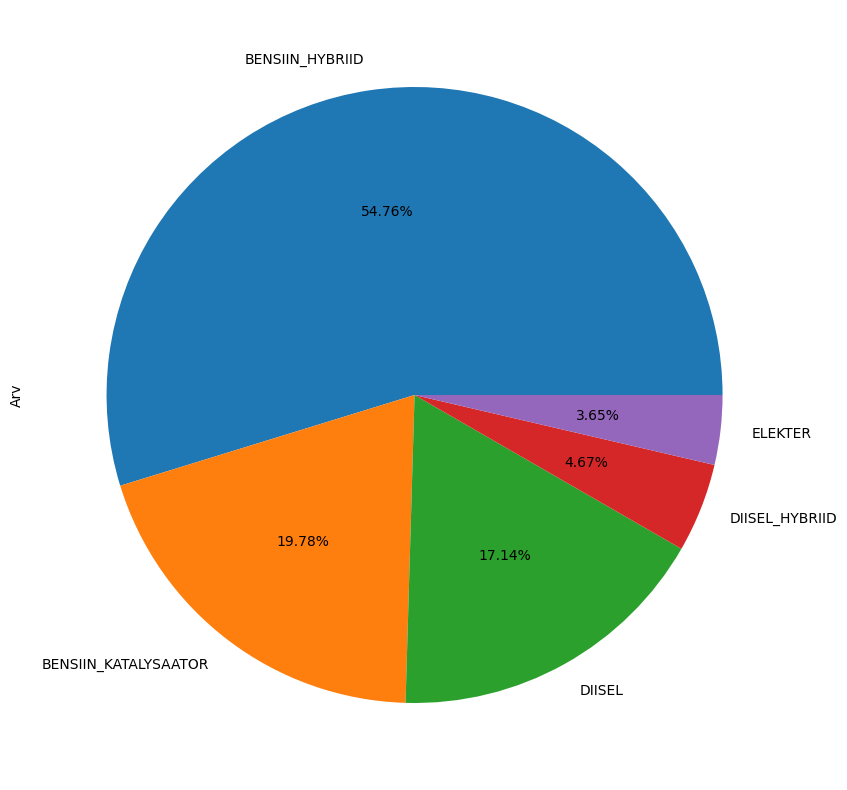

In [19]:
df_suv = df[df["SUV"]]

show_pie(df_suv, "Mootori tüüp")

### Top 10 popular SUV

            short name   Arv
1         SKODA KODIAQ  1576
2          TOYOTA RAV4  1088
3    VOLKSWAGEN TIGUAN   929
4         KIA SPORTAGE   823
5   TOYOTA YARIS CROSS   619
6         DACIA DUSTER   560
7       RENAULT CAPTUR   479
8          TOYOTA C-HR   439
9          SKODA KAMIQ   390
10      HYUNDAI TUCSON   366


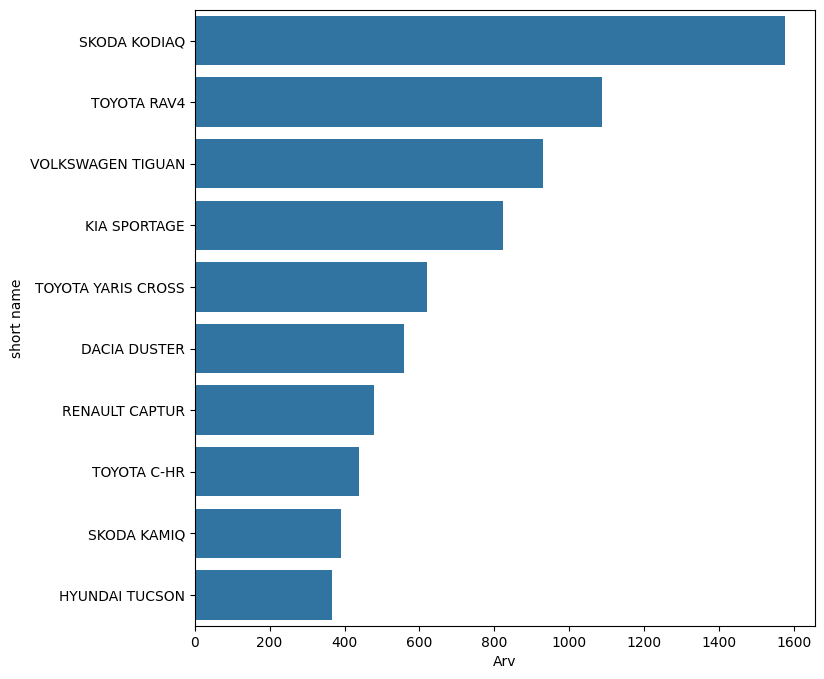

In [20]:
group_sort_and_plot(df_suv, [COLUMN_SHORT_NAME])

### Top 10 popular Diesel SUV

             short name  Arv
1          SKODA KODIAQ  910
2     VOLKSWAGEN TIGUAN  275
3   TOYOTA LAND CRUISER  237
4               AUDI Q5  217
5          DACIA DUSTER  202
6          KIA SPORTAGE  149
7    VOLKSWAGEN TOUAREG  145
8          PEUGEOT 5008  142
9           KIA SORENTO  119
10              AUDI Q7  100


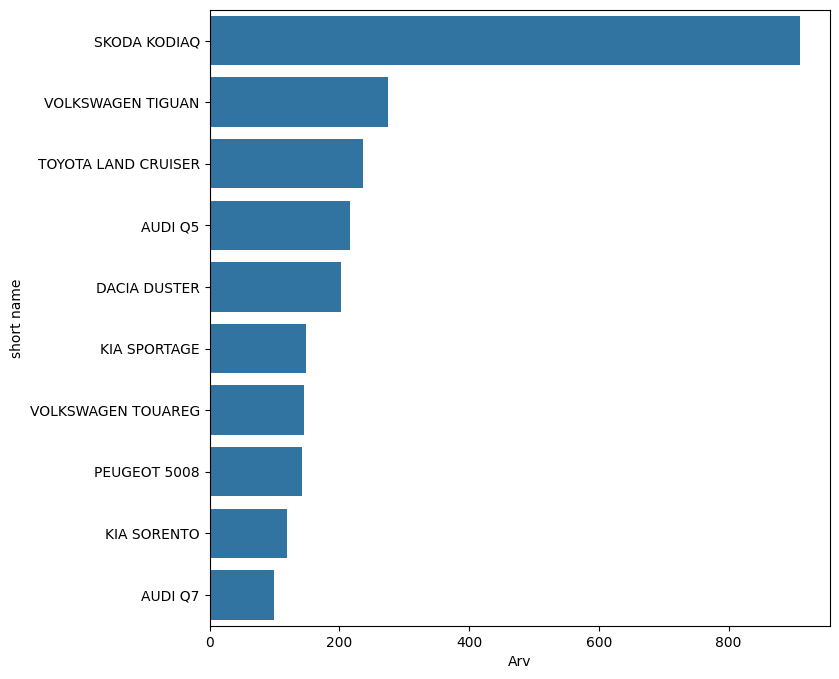

In [21]:
df_diesel_suv = df_diesel[df_diesel["SUV"]]

group_sort_and_plot(df_diesel_suv, [COLUMN_SHORT_NAME])

### Top 10 popular Petrol SUV

            short name  Arv
1          SKODA KAMIQ  390
2          SKODA KAROQ  236
3         SKODA KODIAQ  219
4   VOLKSWAGEN T-CROSS  208
5         DACIA DUSTER  188
6     VOLKSWAGEN T-ROC  186
7         PEUGEOT 2008  154
8       RENAULT CAPTUR  138
9    VOLKSWAGEN TIGUAN  122
10    VOLKSWAGEN TAIGO  122


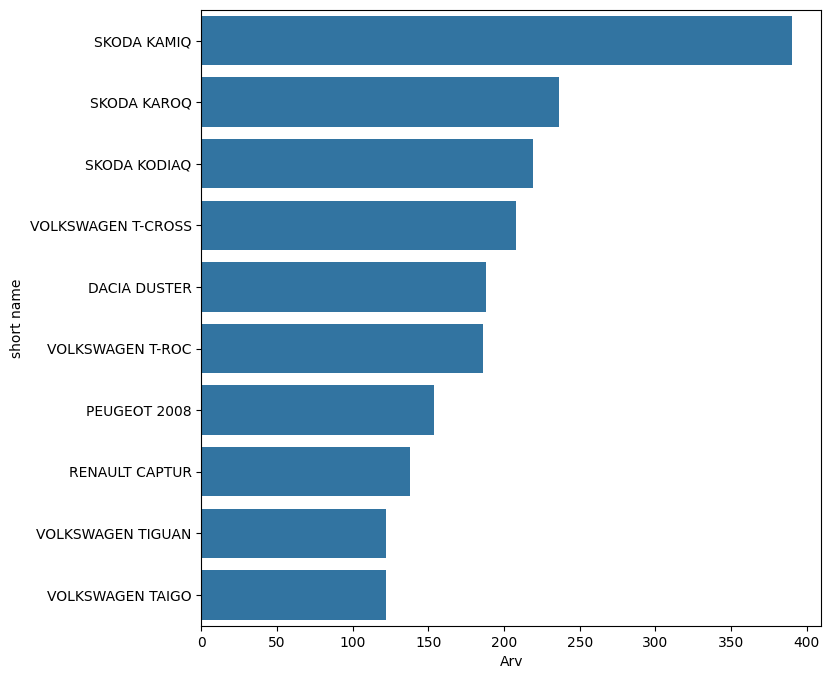

In [22]:
df_petrol_suv = df_petrol[df_petrol["SUV"]]

group_sort_and_plot(df_petrol_suv, [COLUMN_SHORT_NAME])

### Top 10 popular hybrid SUV

            short name   Arv
1          TOYOTA RAV4  1025
2         KIA SPORTAGE   761
3   TOYOTA YARIS CROSS   580
4    VOLKSWAGEN TIGUAN   532
5         SKODA KODIAQ   447
6          TOYOTA C-HR   439
7       HYUNDAI TUCSON   358
8       RENAULT CAPTUR   341
9              AUDI Q5   316
10      NISSAN QASHQAI   301


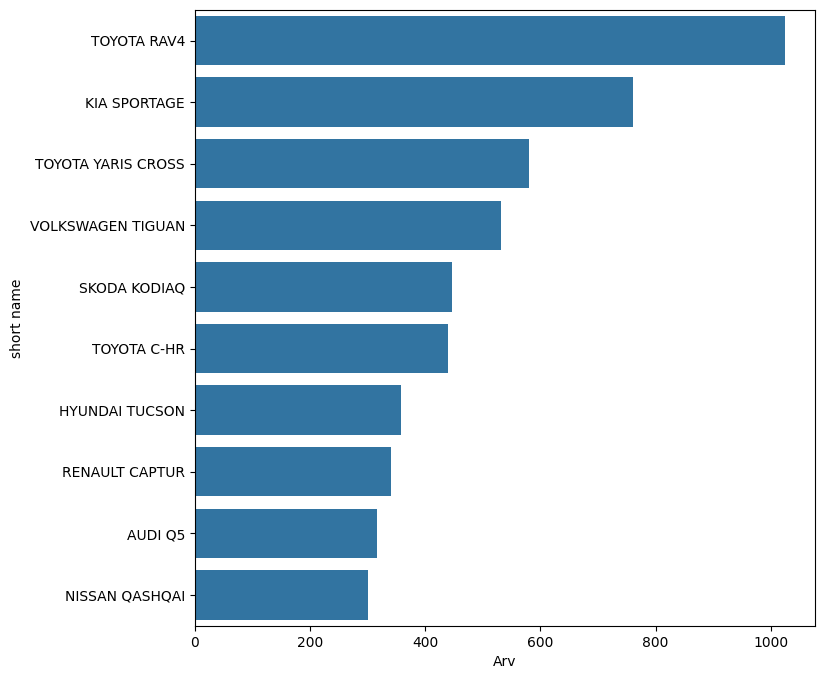

In [23]:
df_hybrid_suv = df_hybrids[df_hybrids["SUV"]]

group_sort_and_plot(df_hybrid_suv, [COLUMN_SHORT_NAME])

### Most popular models per city

In [24]:
# Popular car per each city
cities = sorted(df[COLUMN_CITY].unique())

for city in sorted(cities):
    print()
    print(city)
    group_sort_and_plot(
        df[df[COLUMN_CITY] == city], [COLUMN_SHORT_NAME], limit=3, plot=False
    )


Haapsalu
      short name  Arv
1   KIA SPORTAGE   18
2   SKODA KODIAQ   10
3  SKODA OCTAVIA    9

Keila
      short name  Arv
1   SKODA KODIAQ   13
2  SKODA OCTAVIA    8
3   SKODA SUPERB    7

Kohtla-Järve
      short name  Arv
1  SKODA OCTAVIA   23
2   KIA SPORTAGE   22
3   SKODA KODIAQ   16

Loksa
       short name  Arv
1          BMW X5    4
2  TOYOTA COROLLA    3
3   SKODA OCTAVIA    2

Maardu
       short name  Arv
1   SKODA OCTAVIA   60
2  TOYOTA COROLLA   47
3     TOYOTA RAV4   32

Määramata
       short name  Arv
1   SKODA OCTAVIA  646
2    SKODA KODIAQ  624
3  TOYOTA COROLLA  419

Narva
     short name  Arv
1  KIA SPORTAGE   39
2   TOYOTA RAV4   21
3  SKODA KODIAQ   20

Narva-Jõesuu
       short name  Arv
1  TOYOTA COROLLA    7
2     TOYOTA C-HR    6
3     TOYOTA RAV4    5

Paide
       short name  Arv
1  TOYOTA COROLLA    8
2   SKODA OCTAVIA    7
3    SKODA KODIAQ    6

Pärnu
          short name  Arv
1       SKODA KODIAQ   55
2  VOLKSWAGEN TIGUAN   49
3      SKODA OCTAVIA  

# Top 3 for each mark

In [25]:
df_group = group_and_sort(df, ["Mark"])
marks = df_group.head(20)["Mark"].tolist()
df_group.set_index("Mark", inplace=True)

for mark in marks:
    models = df[df["Mark"] == mark]
    count = df_group.loc[mark, "Arv"]
    print(f"{mark} total: {count}")
    if not models.empty:
        print(f"Top 3 {mark} models")
        group_sort_and_plot(models, [COLUMN_SHORT_NAME], limit=3, plot=False)
        print()

SKODA total: 5503
Top 3 SKODA models
      short name   Arv
1  SKODA OCTAVIA  1859
2   SKODA KODIAQ  1576
3   SKODA SUPERB   558

TOYOTA total: 4794
Top 3 TOYOTA models
           short name   Arv
1      TOYOTA COROLLA  1369
2         TOYOTA RAV4  1088
3  TOYOTA YARIS CROSS   619

VOLKSWAGEN total: 2464
Top 3 VOLKSWAGEN models
          short name  Arv
1  VOLKSWAGEN TIGUAN  929
2  VOLKSWAGEN PASSAT  263
3    VOLKSWAGEN GOLF  242

KIA total: 1807
Top 3 KIA models
     short name  Arv
1  KIA SPORTAGE  823
2      KIA CEED  380
3   KIA SORENTO  125

RENAULT total: 1545
Top 3 RENAULT models
        short name  Arv
1   RENAULT CAPTUR  479
2     RENAULT CLIO  454
3  RENAULT AUSTRAL  178

DACIA total: 1238
Top 3 DACIA models
      short name  Arv
1   DACIA DUSTER  560
2  DACIA SANDERO  439
3   DACIA JOGGER  222

AUDI total: 1093
Top 3 AUDI models
  short name  Arv
1    AUDI Q5  316
2    AUDI Q3  164
3    AUDI Q8  154

PEUGEOT total: 961
Top 3 PEUGEOT models
     short name  Arv
1  PEUGEOT 5008